<a href="https://colab.research.google.com/github/Praveenku32k/Deep-Learning-Implementation/blob/main/ANN_implementation_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
ROOT="/content/drive/MyDrive/Artifical_Neural_Network_class_Lab"

In [2]:
import os
os.chdir(ROOT)

In [3]:
os.getcwd()

'/content/drive/MyDrive/Artifical_Neural_Network_class_Lab'

In [4]:
import tensorflow as tf  #it a library default deep learning.

In [5]:
tf.__version__

'2.6.0'

In [6]:
tf.keras.__version__ #keras is a high level API for tensorflow.

'2.6.0'

It is built top of tensorflow

In [7]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [11]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [12]:
X_train_full.shape

(60000, 28, 28)

In [13]:
y_train_full.shape

(60000,)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
y_test.shape

(10000,)

In [16]:
X_train_full[0].shape

(28, 28)

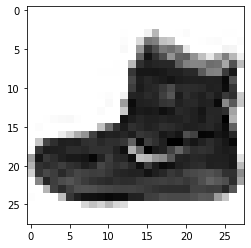

In [17]:
img=X_train_full[0]
plt.imshow(img,cmap="binary")
plt.show()

In [18]:
img.max(),img.min()

(255, 0)

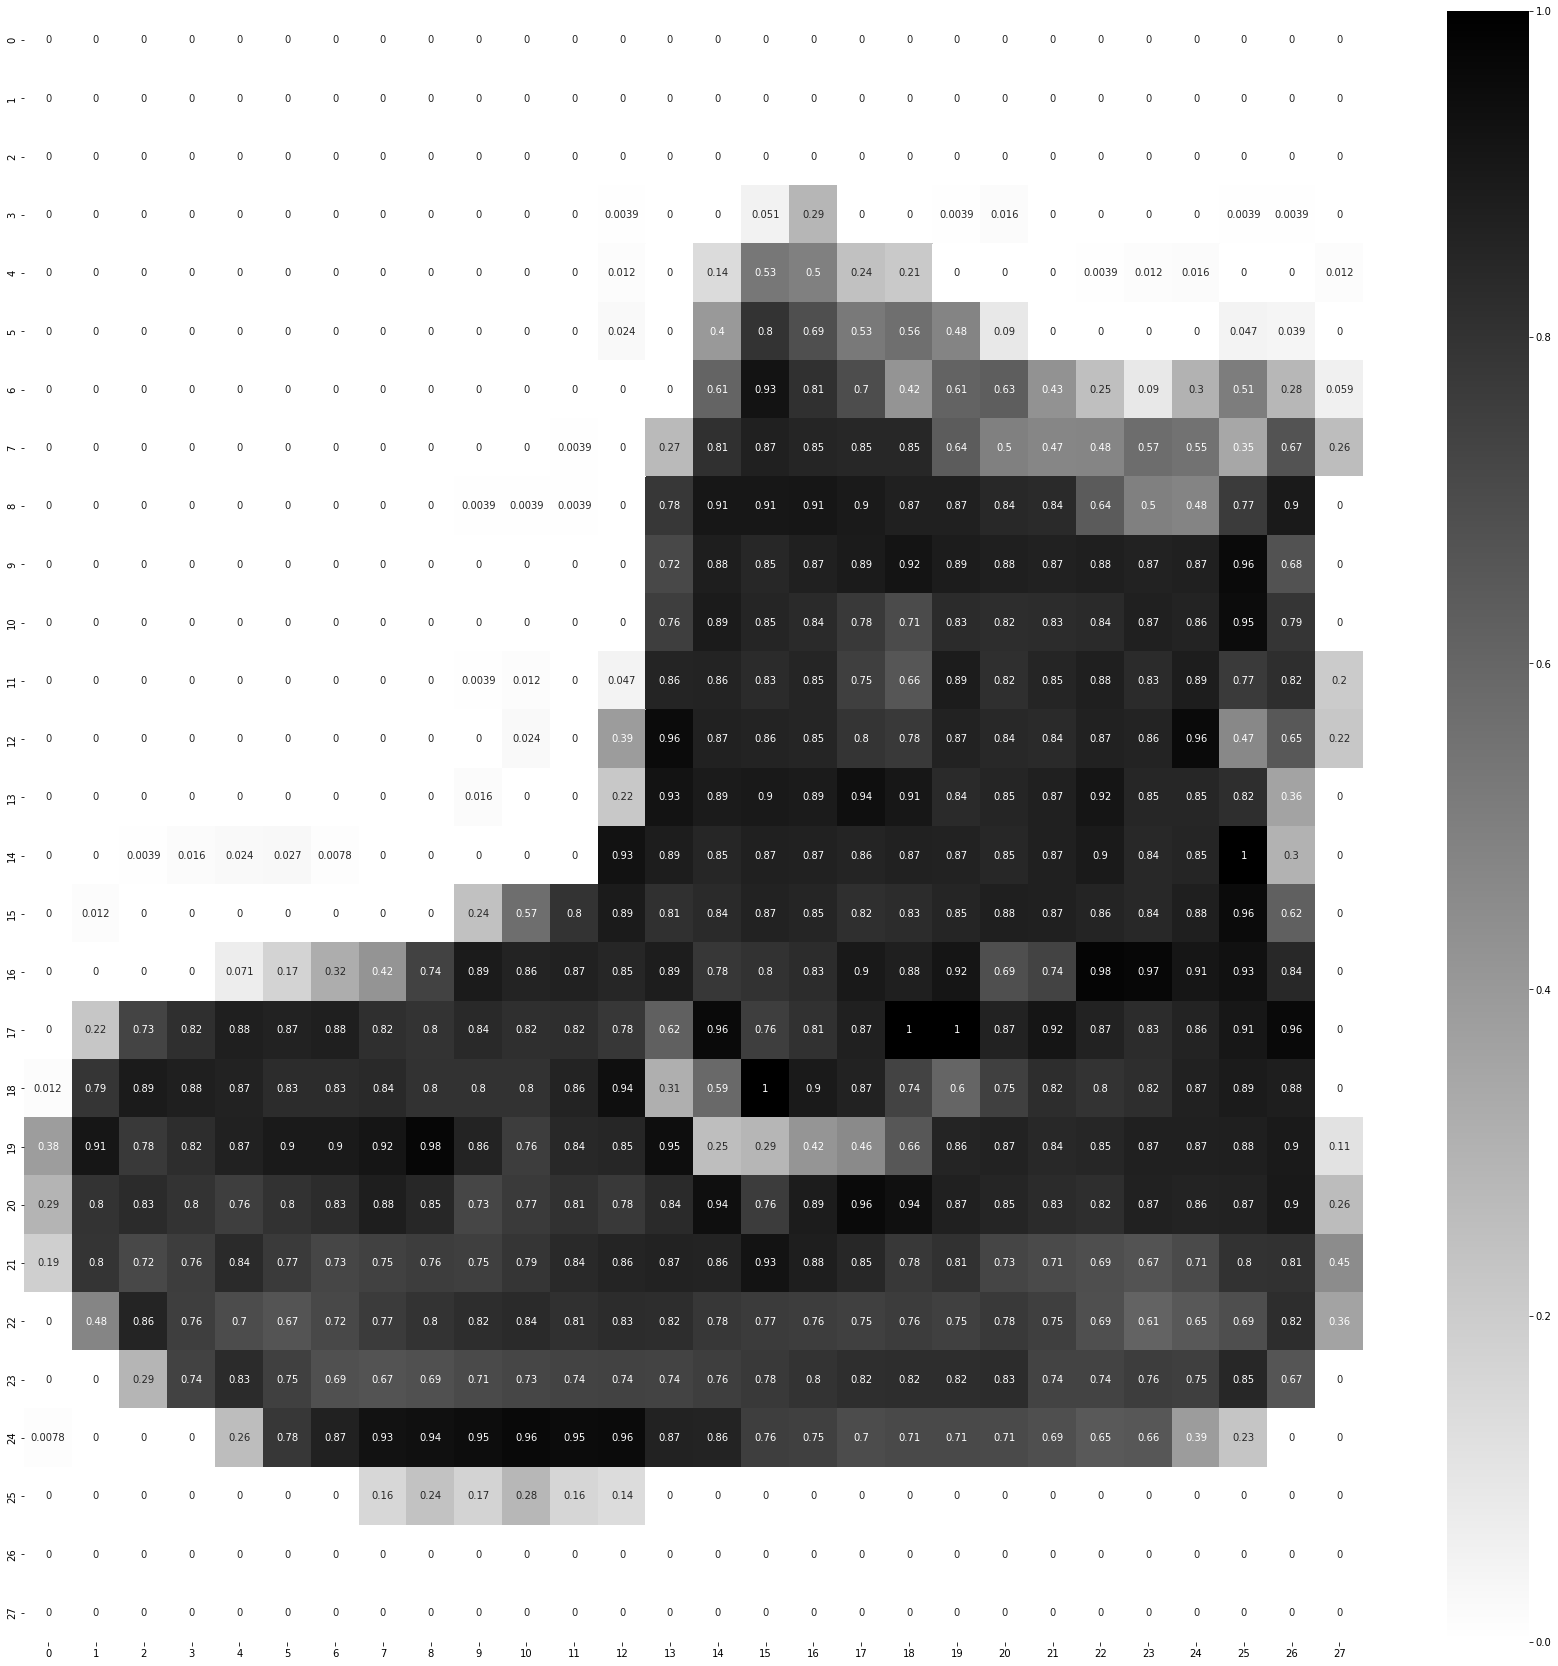

In [19]:
plt.figure(figsize=(30,30))
sns.heatmap(img/255,annot=True,cmap="binary")

In [20]:
X_valid,X_train=X_train_full[:5000] /255. ,X_train_full[5000:] /255.
y_valid,y_train=y_train_full[:5000] /255. ,y_train_full[5000:]
X_test=X_test /255.

In [21]:
LAYERS=[
        tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
        tf.keras.layers.Dense(300,activation="relu",name="HiddenLayer1"),
        tf.keras.layers.Dense(100,activation="relu",name="HiddenLayer2"),
        tf.keras.layers.Dense(10,activation="softmax",name="OutputLayer1")
]


In [22]:
model_clf=tf.keras.Sequential(LAYERS)

In [23]:
model_clf.layers

In [24]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
HiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
OutputLayer1 (Dense)         (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
784*300+300,300*100+100,100*10+10

(235500, 30100, 1010)

In [26]:
np.sum((235500, 30100, 1010))

266610

In [27]:
model_clf.layers[1].name

'HiddenLayer1'

In [28]:
weights,biases=model_clf.layers[1].get_weights()

In [29]:
weights.shape

(784, 300)

In [30]:
biases.shape

(300,)

In [31]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
METRICS=["accuracy"]


model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [32]:
EPOCHS=30
VALIDATION=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7229 - accuracy: 0.7608 - val_loss: 6.8769 - val_accuracy: 0.0788
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4928 - accuracy: 0.8283 - val_loss: 7.3861 - val_accuracy: 0.0750
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4468 - accuracy: 0.8426 - val_loss: 8.2403 - val_accuracy: 0.0668
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4185 - accuracy: 0.8533 - val_loss: 7.9810 - val_accuracy: 0.0778
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3979 - accuracy: 0.8595 - val_loss: 8.0010 - val_accuracy: 0.0750
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3816 - accuracy: 0.8649 - val_loss: 7.9722 - val_accuracy: 0.0782
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3670 - accuracy: 0.8701 - val_loss: 8.4241 - val_accuracy:

##BY DEFAULT BATCH_SIZE IS 32.

In [33]:
55000/32

1718.75

In [34]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [35]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.722925,0.760782,6.876884,0.0788
1,0.492808,0.828345,7.386130,0.0750
2,0.446826,0.842582,8.240284,0.0668
3,0.418513,0.853273,7.981026,0.0778
4,0.397917,0.859473,8.001004,0.0750
5,0.381635,0.864945,7.972238,0.0782
6,0.366960,0.870073,8.424087,0.0788
7,0.355436,0.875255,8.313051,0.0766
8,0.346150,0.877727,8.967942,0.0706
9,0.335407,0.881636,8.818296,0.0702


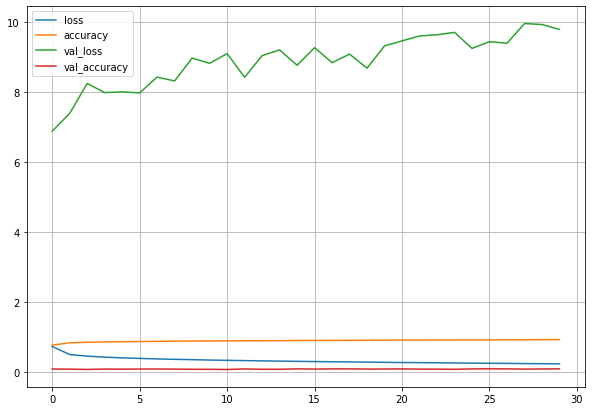

In [36]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [37]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3417 - accuracy: 0.8798


[0.34173884987831116, 0.879800021648407]

In [38]:
10000/32

312.5

In [39]:
X_new=X_test[:3]

y_prob=model_clf.predict(X_new)
y_prob

array([[3.3491146e-06, 3.6417325e-07, 1.6549952e-06, 1.7850687e-06,
        3.5197304e-06, 9.5270304e-03, 1.8700707e-06, 3.5162080e-02,
        1.9048207e-04, 9.5510781e-01],
       [7.4769459e-06, 1.0500616e-08, 9.9811918e-01, 8.8332692e-09,
        1.7851159e-03, 8.2794244e-11, 8.8119996e-05, 1.1233138e-12,
        8.0839882e-08, 8.5209522e-12],
       [4.5215611e-06, 9.9999499e-01, 1.3974073e-07, 4.3894868e-08,
        1.8027005e-07, 8.3276840e-12, 1.3389087e-09, 6.1174610e-10,
        1.1085449e-09, 2.2016777e-11]], dtype=float32)

In [40]:
X_new=X_test[:3]

y_prob=model_clf.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [41]:
X_new=X_test[:2]

y_prob=model_clf.predict(X_new)
y_prob.round(1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
y_prob.shape

(2, 10)

In [43]:
y_pred=np.argmax(y_prob,axis=-1)
y_pred

array([9, 2])

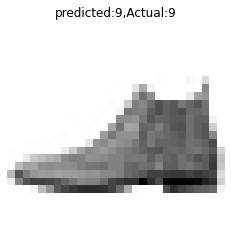

-------------


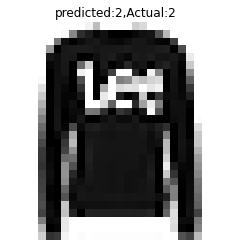

-------------


In [44]:
for img_array,pred,actual in zip(X_new,y_pred,y_test[:3]):
  plt.imshow(img_array,cmap="binary")
  plt.title(f"predicted:{pred},Actual:{actual}")
  plt.axis("off")
  plt.show()
  print("-------------")

In [45]:
import time 
import os
def saveModel_path(model_dir="SAVED_MODELS"):
   os.makedirs(model_dir,exist_ok=True)
   fileName =time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")#h5 is extension where keras save the model.
   #h5 is fixed in the keras ,so we have to use this .
   model_path=os.path.join(model_dir,fileName)#we are define the path here .
   print(f"your model  will be saved at the following location\n{model_path}")
   return model_path


In [46]:
UNIQUE_PATH=model_clf.save(saveModel_path())

your model  will be saved at the following location
SAVED_MODELS/Model_2021_09_28_07_47_21_.h5
